<a href="https://colab.research.google.com/github/Ritacheta/Cifar-10-Project/blob/master/CIFAR_10_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing **Libraries**

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import datetime
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical( train_labels, num_classes=10, dtype='float32')
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10, dtype='float32')

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog',
               'frog','horse','ship','truck']

Process **images**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255.0,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
    )

test_datagen = ImageDataGenerator(
    rescale = 1./255.0,
    )

batch_size=64

training_set = train_datagen.flow(train_images,train_labels,
                                  batch_size=batch_size)

test_set = test_datagen.flow(test_images,test_labels,
                                  batch_size=batch_size)


Creating the Network

In [ ]:
model =Sequential([
                   Conv2D(32, (3,3), activation='relu', padding='same', input_shape = (32,32,3)),
                   BatchNormalization(),
                   Conv2D(32, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   MaxPooling2D((2,2)),
                   Dropout(0.25),
                   Conv2D(64, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   Conv2D(64, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   MaxPooling2D((2,2)),
                   Dropout(0.3),
                   Conv2D(128, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   Conv2D(128, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   MaxPooling2D((2,2)),
                   Dropout(0.4),
                   Conv2D(512, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   Conv2D(512, (3,3), activation='relu', padding='same'),
                   BatchNormalization(),
                   MaxPooling2D((2,2)),
                   Dropout(0.5),
                   Flatten(),
                   Dense(512, activation='relu'),
                   BatchNormalization(),
                   Dropout(0.4),
                   Dense(512, activation='relu'),
                   BatchNormalization(),
                   Dropout(0.4),
                   Dense(10, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

Optimizer

In [ ]:
 opt = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
     name='Adam'
 )
 
model.compile(optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
# history = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_data=(test_images, test_labels))
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(training_set, epochs=10, validation_data=test_set, callbacks = [tensorboard_callback])

model.evaluate(test_images, test_labels, verbose=1)

Epoch 1/10
  1/782 [..............................] - ETA: 0s - loss: 3.4557 - accuracy: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
782/782 [==============================] - 30s 39ms/step - loss: 1.9995 - accuracy: 0.3695 - val_loss: 1.7825 - val_accuracy: 0.4738
Epoch 2/10
782/782 [==============================] - 29s 38ms/step - loss: 1.4191 - accuracy: 0.5428 - val_loss: 1.3009 - val_accuracy: 0.5971
Epoch 3/10
782/782 [==============================] - 30s 38ms/step - loss: 1.1988 - accuracy: 0.6278 - val_loss: 1.1265 - val_accuracy: 0.6713
Epoch 4/10
782/782 [==============================] - 29s 37ms/step - loss: 1.0684 - accuracy: 0.6725 - val_loss: 1.3934 - val_accuracy: 0.6039
Epoch 5/10
782/782 [==============================] - 29s 37ms

[28.154977798461914, 0.29899999499320984]

Ploting train vs **validation**

In [ ]:
%tensorboard --logdir logs/fit

Launching TensorBoard...

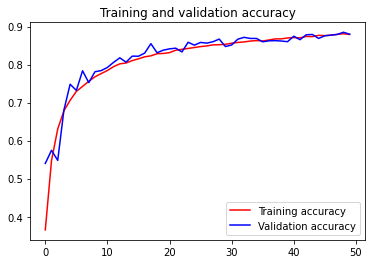

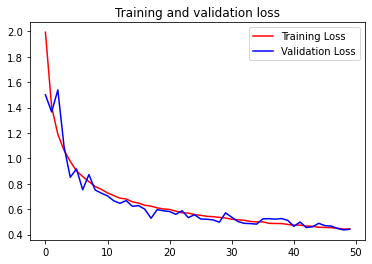

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()